# The Sparks Foundation (GRIPDEC20 DSBA Task1)

## Exploratory data analysis on SuperStore Dataset

## Author : Mrunal Battise


In [ ]:
##START

## Importing Required Libraries

In [2]:
import pandas as pd                                #Importing Required Libraries
import numpy as np                                 #Numpy and Pandas for Handling Data
import matplotlib.pyplot as plt                    #Matplotlib and Seaborn for Visualizing Data
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_csv("SampleSuperstore.csv")          #Reading Dataset using Pandas 
df=pd.DataFrame(data)                             #Converting Dataset into Pandas DataFrame(2D)
df.head(2) 


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820


In [4]:
df1=df.drop(["Country","Postal Code"],axis=1)     #Dropped insignificant Columns
df1.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df1.shape                #can count values of 

(9994, 11)

# 1.General Plots

Text(0, 0.5, 'Count')

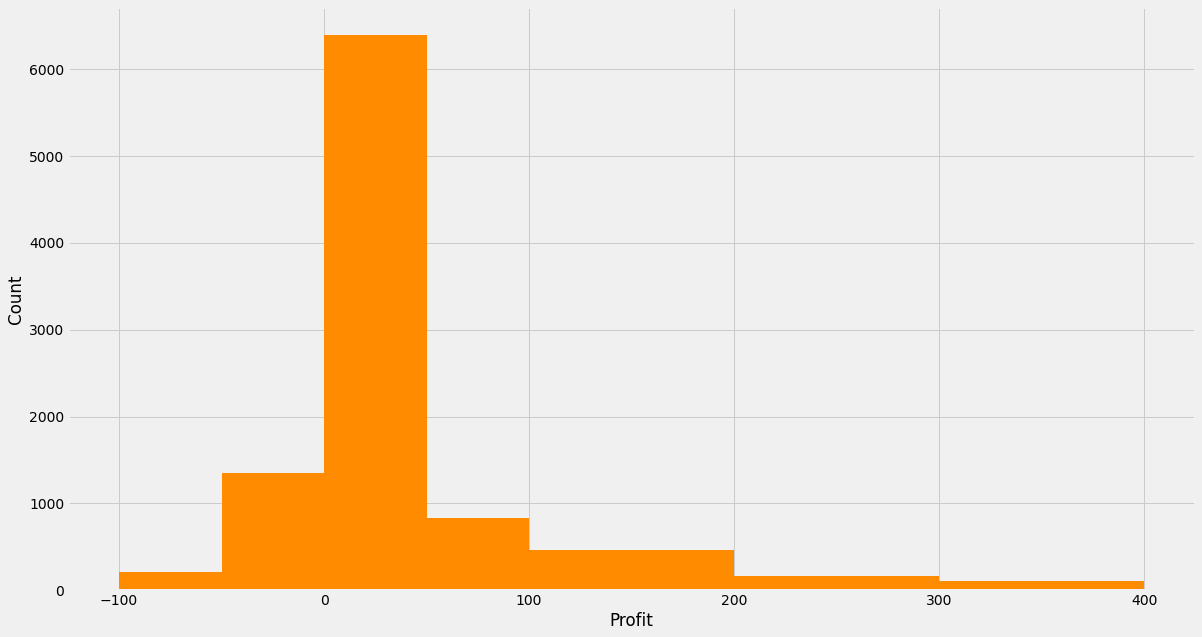

In [245]:
plt.figure(figsize=(18,10))
plt.style.use('fivethirtyeight')
plt.hist(df1["Profit"],bins=[-100,-50,0,50,100,200,300,400],color='darkorange')
plt.xlabel("Profit")
plt.ylabel("Count")

## Above plot show distribution of Profit/Loss per cents
## Most of Profit percentage lies betwen 0 to 50%

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

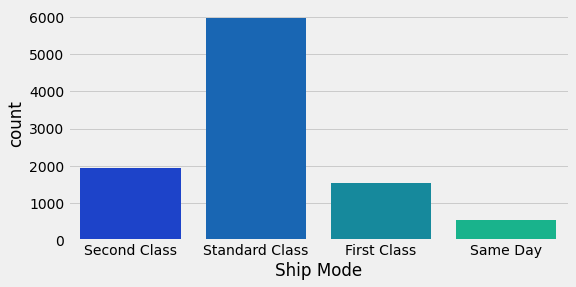

In [199]:
plt.figure(figsize=(8,4))
sns.countplot(x=df1["Ship Mode"],data=df1,palette="winter")

<AxesSubplot:ylabel='Ship Mode'>

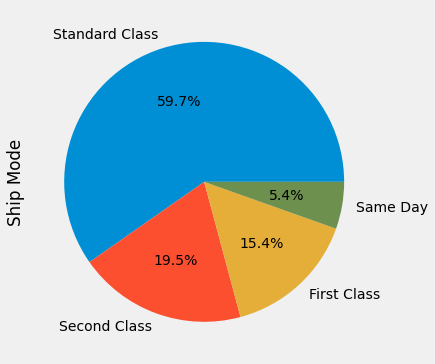

In [241]:
df1["Ship Mode"].value_counts().plot.pie(autopct="%1.1f%%",figsize=[6,6])

## Above plot shows which Ship Mode is more preferred by Customer 
## Standard Class is Most Preferred (by around 60%) cutomers

<AxesSubplot:xlabel='Category', ylabel='count'>

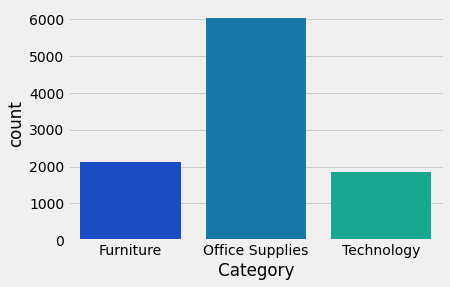

In [200]:
sns.countplot(x=df1["Category"],data=df1,palette="winter")


<AxesSubplot:ylabel='Category'>

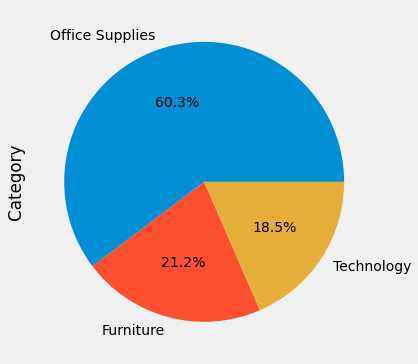

In [246]:
df1["Category"].value_counts().plot.pie(autopct="%1.1f%%",figsize=[6,6])

## Office Supllies cover around 60% of Store's Sales 

<AxesSubplot:xlabel='Region', ylabel='count'>

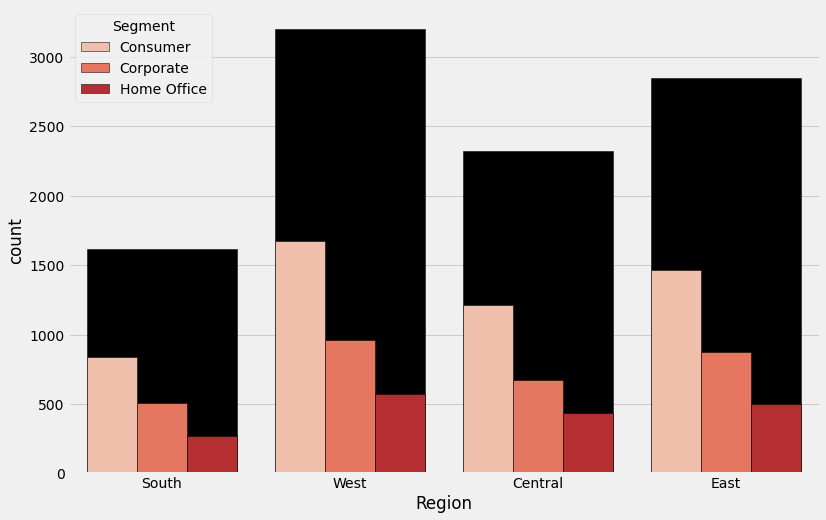

In [9]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')
sns.countplot(x=df1["Region"],data=df1,edgecolor="Black",color="Black")
sns.countplot(x=df1["Region"],data=df1,hue=df1["Segment"],edgecolor="Black",palette="Reds")

## Black Bars Shows Sells counts per Regions
## Red Sub-Bars shows segment of sale in that regions
# Insight-
## Most sells in West and Least in South
## Consumer Segemnt buys most and Home office buys least in all region

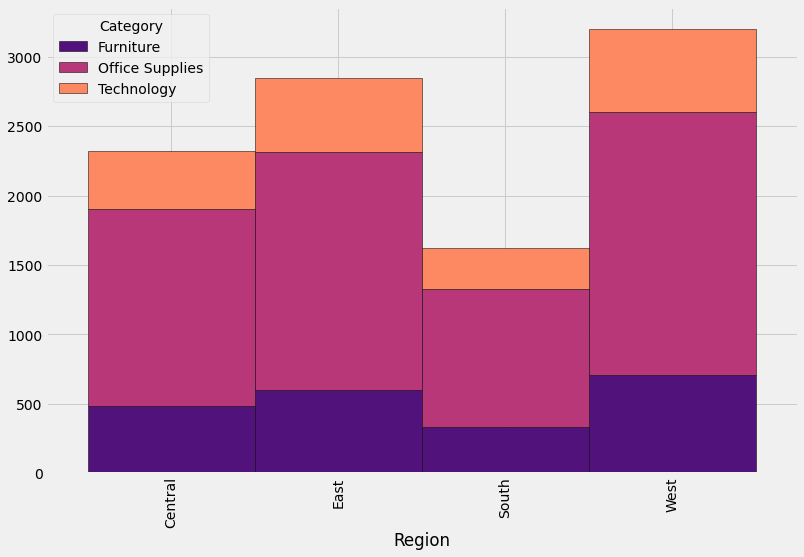

In [100]:
region_category=pd.crosstab(df1.Region,df1.Category)
region_category.plot.bar(stacked=True,width=1,color=sns.color_palette('magma',3),edgecolor='Black')
fig=plt.gcf()
fig.set_size_inches(12,8)

## Above plot shows how each Category occupies Sales in Different Region
## In all regions Office Supplies items are sold most

# 2.Analysing States

<AxesSubplot:xlabel='count', ylabel='State'>

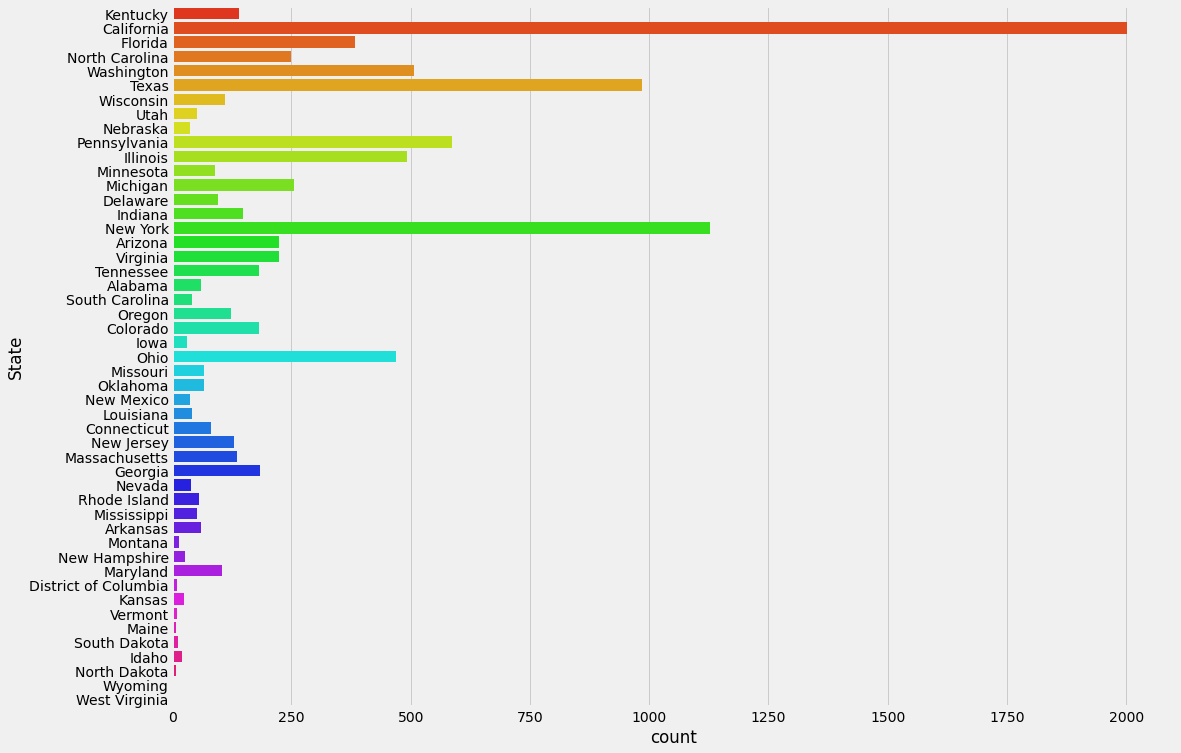

In [103]:
plt.figure(figsize=(16,12))
plt.style.use('fivethirtyeight')
sns.countplot(y=df1["State"],data=df1,palette="hsv")

## California,New York and Texas are state with highest sales resp.
## Wyoming, West Verginia with Lowest Sales

In [123]:
top_state=df1.groupby(['State'])['Sales'].sum()
top_state=top_state.sort_values(ascending=False)[0:5]
top_state

State
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Name: Sales, dtype: float64

Text(0.5, 1.0, '5 State with Most Sales in USD')

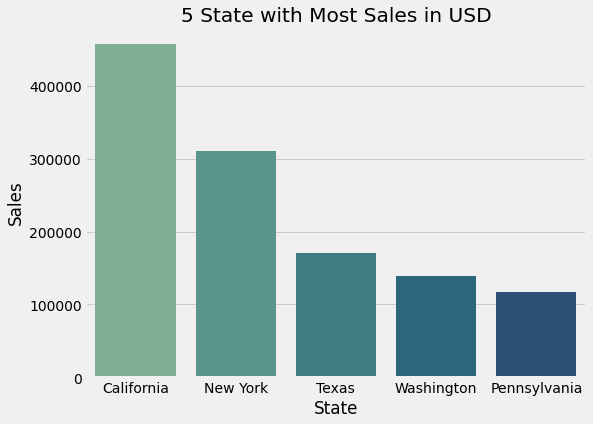

In [143]:
plt.figure(figsize=(8,6))
sns.barplot(x=top_state.keys(),y=top_state,palette='crest')
plt.title("5 State with Most Sales in USD")

## This Plot says SuperStore made Highest Sales in California of around 450K USD 
## and 300K and 170K USD in New York and Texas Resp.

In [130]:
last_state=df1.groupby(['State'])['Sales'].sum()
last_state=last_state.sort_values()[0:5]
last_state

State
North Dakota      919.910
West Virginia    1209.824
Maine            1270.530
South Dakota     1315.560
Wyoming          1603.136
Name: Sales, dtype: float64

Text(0.5, 1.0, '5 State with Least Sales in USD')

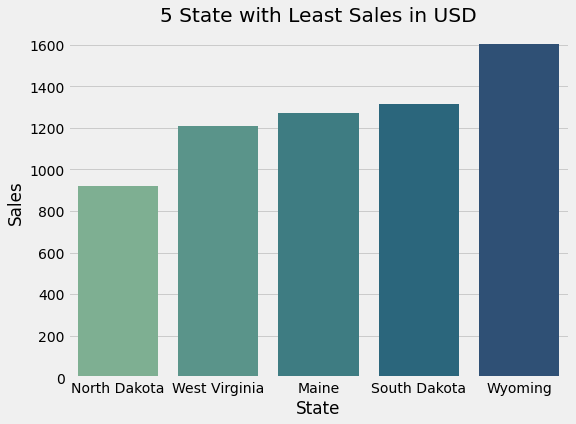

In [145]:
plt.figure(figsize=(8,6))
sns.barplot(x=last_state.keys(),y=last_state,palette='crest')
plt.title("5 State with Least Sales in USD")

## SuperStore Selling Least in this States. Only 900 USD in North Dakota 
## Store need to focus on this Sates to Grow there Buisness here.

Text(0.5, 1.0, 'Sales in California by Category')

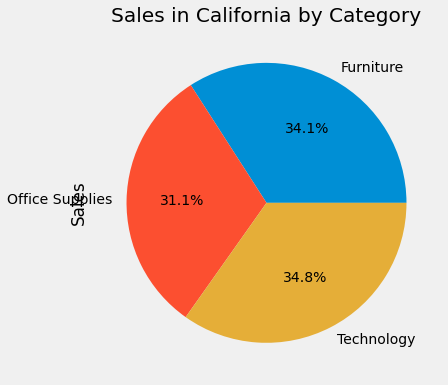

In [236]:

California=df[df.State=='California']
Cali_cat_sales=California.groupby(['Category'])['Sales'].sum()
Cali_cat_profit=California.groupby(['Category'])['Profit'].sum()
Cali_cat_sales.plot.pie(autopct="%1.1f%%",figsize=[6,6])
plt.title('Sales in California by Category')



Text(0.5, 1.0, 'Profit in California by Category')

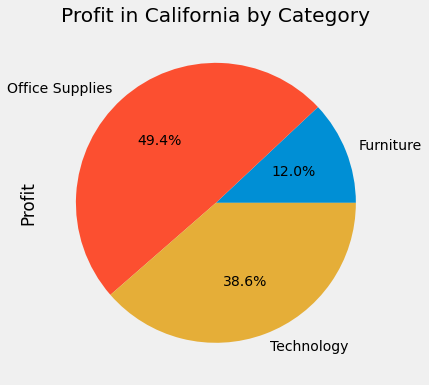

In [235]:
Cali_cat_profit.plot.pie(autopct="%1.1f%%",figsize=[6,6])
plt.title('Profit in California by Category')


## In above two pie charts we take look at Sales and Profit (% shares) made by each Category in California
## One can do it for thier State or City of interest

In [107]:
cat_subcat=df1.groupby(['Category'])['Sub-Category'].unique()
cat_subcat

Category
Furniture                   [Bookcases, Chairs, Tables, Furnishings]
Office Supplies    [Labels, Storage, Art, Binders, Appliances, Pa...
Technology                  [Phones, Accessories, Machines, Copiers]
Name: Sub-Category, dtype: object

In [113]:
cat_subcat.iloc[1]

array(['Labels', 'Storage', 'Art', 'Binders', 'Appliances', 'Paper',
       'Envelopes', 'Fasteners', 'Supplies'], dtype=object)

# 3.Analysing Sub-Category( Items)

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

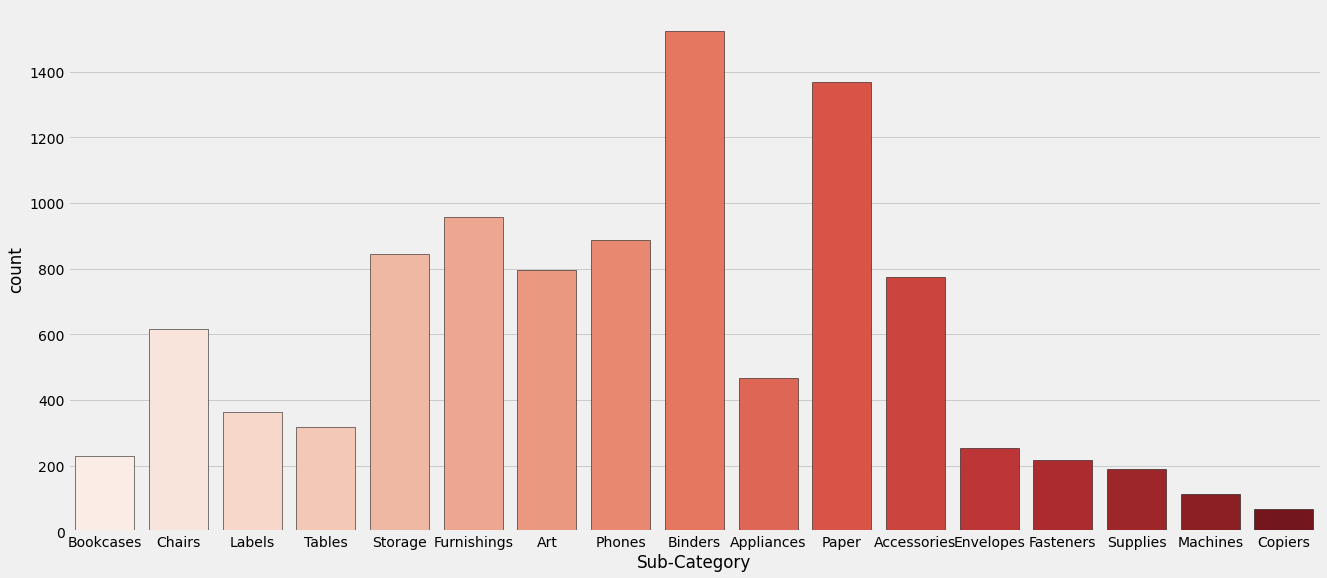

In [119]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,9))
sns.countplot(x='Sub-Category',data=df1,palette='Reds',edgecolor="Black")

## In above plot we observe Binders has Highest Sales 
## and Copiers has Lowest Sales

<AxesSubplot:ylabel='Sub-Category'>

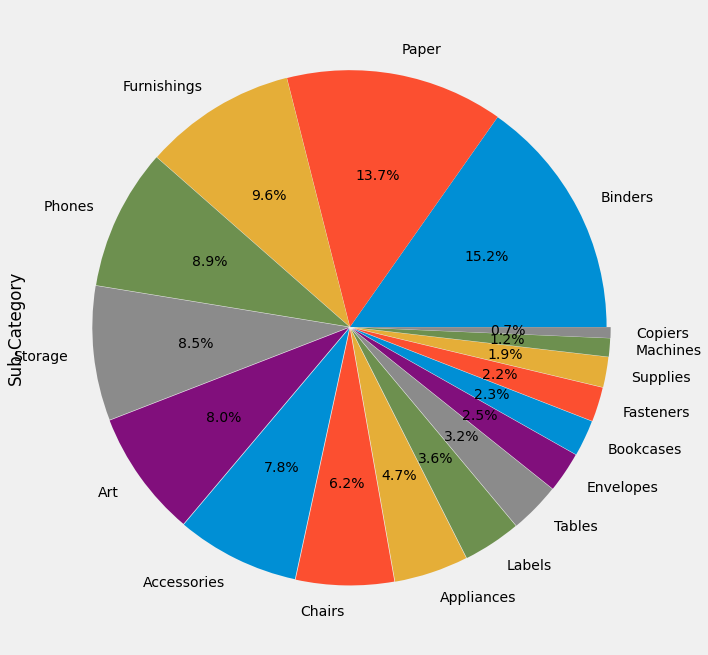

In [12]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=[11,11])
explode=list(np.arange(0,0.017,0.001))
df1["Sub-Category"].value_counts().plot.pie(autopct="%1.1f%%",explode=explode)

## pie plot shows % shares of items(sub-category) in total 100% Sales
## Binders,Papers, Furnishings and Phones together forms around 47% shares

In [13]:
s=df1.groupby(["Sub-Category"])["Sales","Profit"].sum()
s

<ipython-input-13-c4338f04b63f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  s=df1.groupby(["Sub-Category"])["Sales","Profit"].sum()


,Sales,Profit
Sub-Category,,
Accessories,167380.3180,41936.6357
Appliances,107532.1610,18138.0054
Art,27118.7920,6527.7870
Binders,203412.7330,30221.7633
Bookcases,114879.9963,-3472.5560
Chairs,328449.1030,26590.1663
Copiers,149528.0300,55617.8249
Envelopes,16476.4020,6964.1767
Fasteners,3024.2800,949.5182


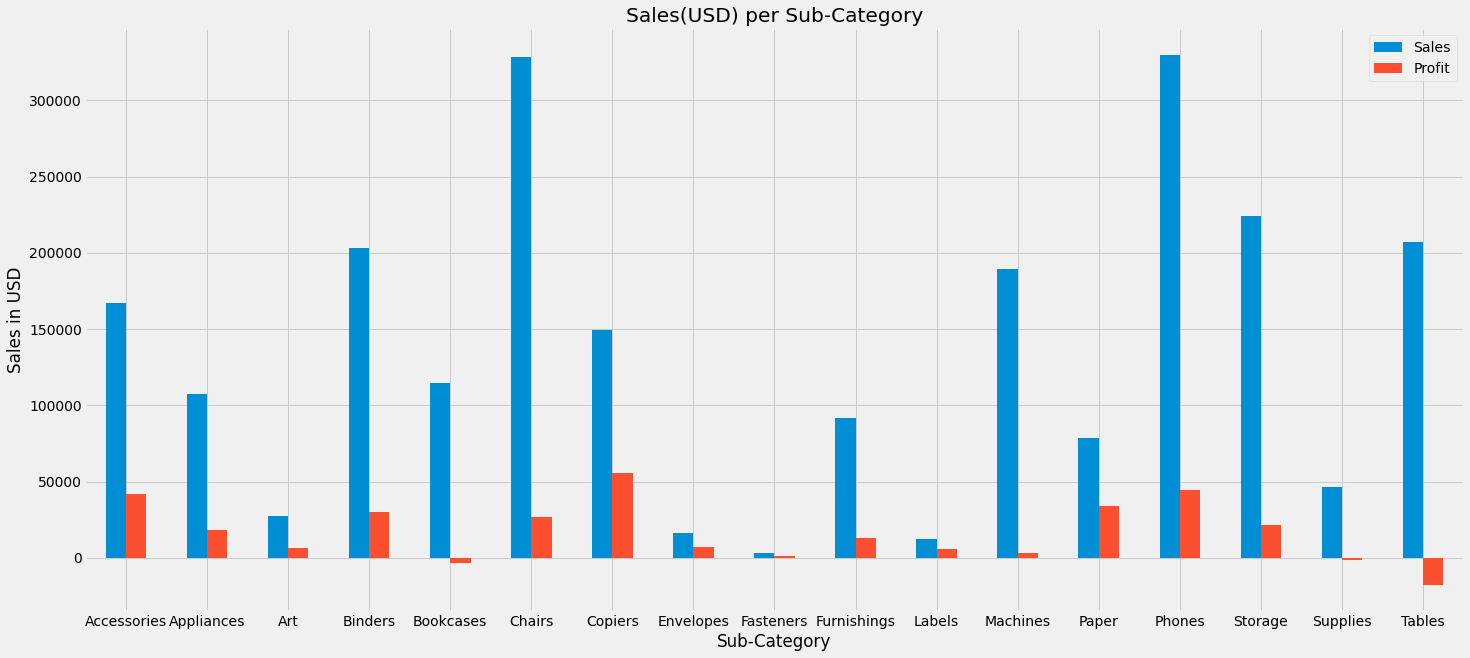

In [44]:
s.plot.bar(rot=0,figsize=(22,10),title="Sales(USD) per Sub-Category")
plt.ylabel("Sales in USD")
plt.show(block=True)

## shows total sales in USD for each item(sub-category)
## Phone generate most money for Market but not Profit
## Copiers are most profit making item for market

In [15]:
top_sell=s.sort_values(by=["Sales"],ascending=False)[0:5]
top_sell

,Sales,Profit
Sub-Category,,
Phones,330007.054,44515.7306
Chairs,328449.103,26590.1663
Storage,223843.608,21278.8264
Tables,206965.532,-17725.4811
Binders,203412.733,30221.7633


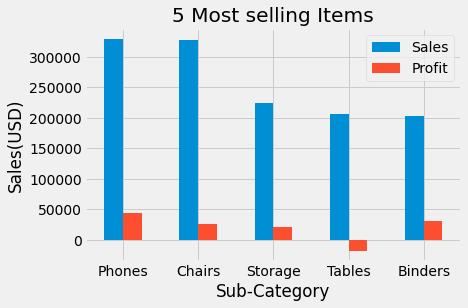

In [16]:
top_sell.plot.bar(rot=0,title="5 Most selling Items")
plt.ylabel("Sales(USD)")
plt.show(block=True)

## This are Most selling Items by Gross Sales(in USD) along with Profit(in USD)
## Even Table is 4th most sold item it had given loss of 17K USD to Store
## NOT BY NO. OF UNITS SOLD

In [67]:
sp=df1.groupby(["Sub-Category"])["Profit"].sum()
top_profit=sp.sort_values(ascending=False)[0:5]
top_profit

Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Name: Profit, dtype: float64

<AxesSubplot:title={'center':'5 Most profit making Items'}, xlabel='Sub-Category', ylabel='Profit(USD)'>

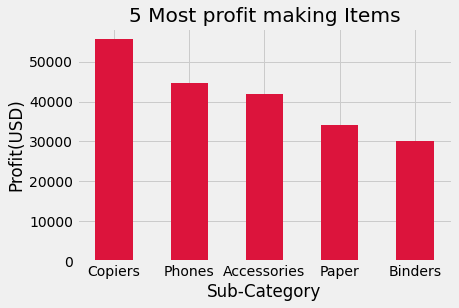

In [69]:
top_profit.plot.bar(rot=0,title="5 Most profit making Items",ylabel="Profit(USD)",color='crimson')

## Copiers gives Highest Profit of 50000(USD) to Store

In [72]:
top_loss=sp.sort_values()[0:5]
top_loss

Sub-Category
Tables      -17725.4811
Bookcases    -3472.5560
Supplies     -1189.0995
Fasteners      949.5182
Machines      3384.7569
Name: Profit, dtype: float64

<AxesSubplot:title={'center':'5 least profit making Items'}, xlabel='Sub-Category'>

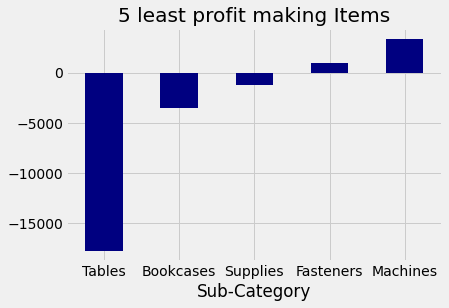

In [74]:
top_loss.plot.bar(rot=0,title="5 least profit making Items",color='navy')

##  Tables,Bookcases and Supplies Together given Loss of around 22000 USD to Store

# 4.Analysing Cities 

In [21]:
top_city=df1.City.value_counts()[0:10]
top_city

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Name: City, dtype: int64

In [22]:
top_city.keys()

Index(['New York City', 'Los Angeles', 'Philadelphia', 'San Francisco',
       'Seattle', 'Houston', 'Chicago', 'Columbus', 'San Diego',
       'Springfield'],
      dtype='object')

Text(0.5, 1.0, 'Top Cities according to Number of Total Sells')

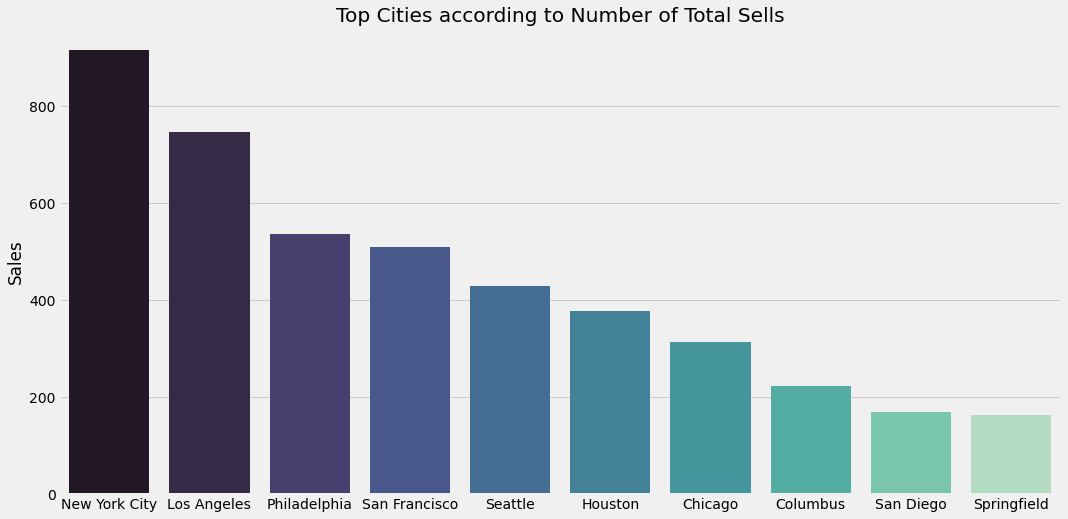

In [52]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
sns.barplot(x=top_city.keys(),y=top_city,palette='mako')
plt.ylabel("Sales")
plt.title("Top Cities according to Number of Total Sells")


## NewYork city has highest number of sales in country followed by Los Angeles and Philadelphia

In [28]:
s3=df1.groupby(["City"])["Sales"].sum()
total_sales=s3.sort_values(ascending=False)[0:10]
total_sales


City
New York City    256368.1610
Los Angeles      175851.3410
Seattle          119540.7420
San Francisco    112669.0920
Philadelphia     109077.0130
Houston           64504.7604
Chicago           48539.5410
San Diego         47521.0290
Jacksonville      44713.1830
Springfield       43054.3420
Name: Sales, dtype: float64

<AxesSubplot:title={'center':'Top 10 Cities as per total sales(USD)'}, xlabel='City', ylabel='Total_Sales(USD)'>

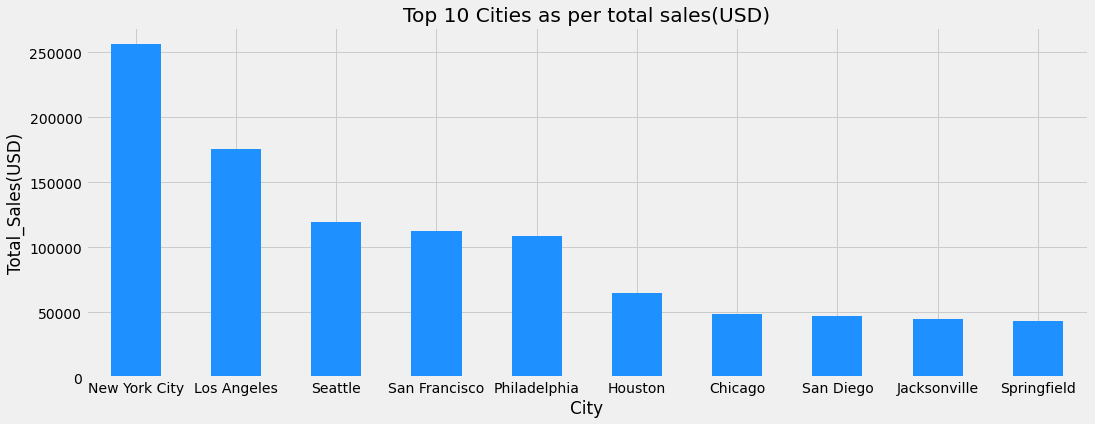

In [151]:
plt.figure(figsize=[16,6])
total_sales.plot.bar(rot=0,ylabel="Total_Sales(USD)",title="Top 10 Cities as per total sales(USD)",color='dodgerblue')

## Above plot shows 10 cities with highest Gross Sales in USD 
## Alone NewYork made profit of arund 250,000 USD

In [136]:
least_total_sales=s3.sort_values()[0:5]
least_total_sales

City
Abilene         1.392
Elyria          1.824
Jupiter         2.064
Pensacola       2.214
Ormond Beach    2.808
Name: Sales, dtype: float64

<AxesSubplot:title={'center':'5 Cities with least total sells(USD)'}, xlabel='City', ylabel='Total_Sales(USD)'>

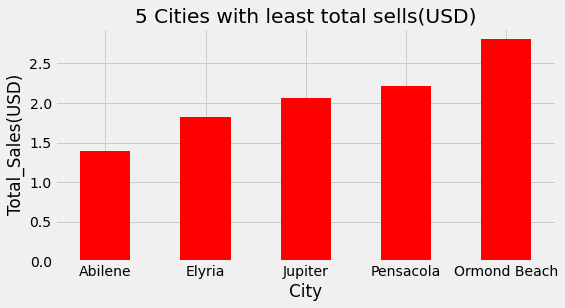

In [148]:
plt.figure(figsize=[8,4])
least_total_sales.plot.bar(rot=0,ylabel="Total_Sales(USD)",title="5 Cities with least total sells(USD)",color='red')

## SuperStore Sales are Negligible in this cities(less the just 3 USD) 

In [132]:
s1=df1.groupby(["City"])["Discount"].sum()
top_discount=s1.sort_values(ascending=False)[0:5]
top_discount

City
Philadelphia    175.50
Houston         143.14
Chicago         120.50
Dallas           56.30
Los Angeles      55.50
Name: Discount, dtype: float64

Text(0.5, 1.0, '5 Most Discount Offering Cities')

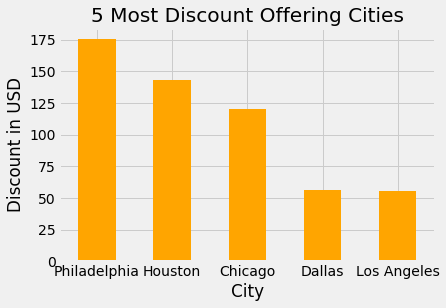

In [133]:
top_discount.plot.bar(rot=0,ylabel='Discount in USD',color='orange')
plt.title("5 Most Discount Offering Cities")

## Philadelphia offered most disccount than an other city 

In [154]:
s2=df1.groupby(["City"])["Profit"].sum()
top_profit=s2.sort_values(ascending=False)[0:10]
top_profit

City
New York City    62036.9837
Los Angeles      30440.7579
Seattle          29156.0967
San Francisco    17507.3854
Detroit          13181.7908
Lafayette        10018.3876
Jackson           7581.6828
Atlanta           6993.6629
Minneapolis       6824.5846
San Diego         6377.1960
Name: Profit, dtype: float64

Text(0.5, 1.0, '10 Most Profit Making Cities(USD)')

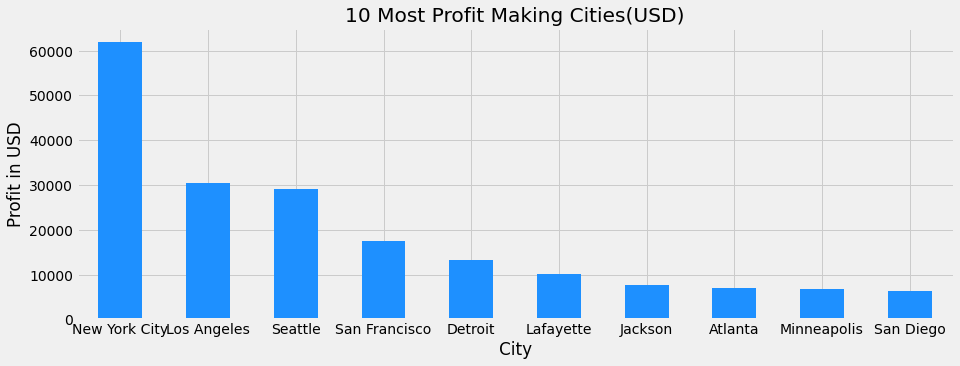

In [155]:
plt.figure(figsize=[14,5])
top_profit.plot.bar(rot=0,ylabel="Profit in USD",color='dodgerblue')
plt.title("10 Most Profit Making Cities(USD)")


## Above plot shows 10 cities with highest Gross Profit in USD 
## Alone NewYork made profit of about 60000 USD

In [34]:
top_loss=s2.sort_values()[0:10]
top_loss

City
Philadelphia   -13837.7674
Houston        -10153.5485
San Antonio     -7299.0502
Lancaster       -7239.0684
Chicago         -6654.5688
Burlington      -3622.8772
Dallas          -2846.5257
Phoenix         -2790.8832
Aurora          -2691.7386
Jacksonville    -2323.8350
Name: Profit, dtype: float64

Text(0.5, 1.0, '10 Most Loss Making Cities(USD)')

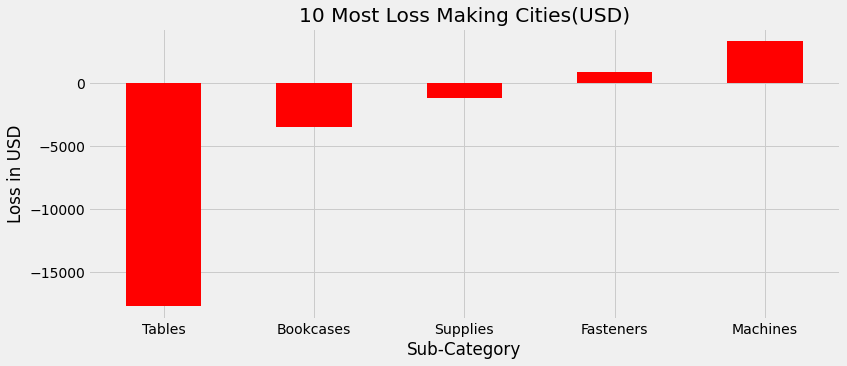

In [157]:
plt.figure(figsize=[12,5])
top_loss.plot.bar(rot=0,ylabel="Loss in USD",color='red')
plt.title("10 Most Loss Making Cities(USD)")

## Philadelphia is most loss making City for SuperStore even making
## 3rd highest number of Sales.
## Also Houstan given loss of 10K USD even having Sales of 64K USD(6th Highest)

# 5. Extra Plots

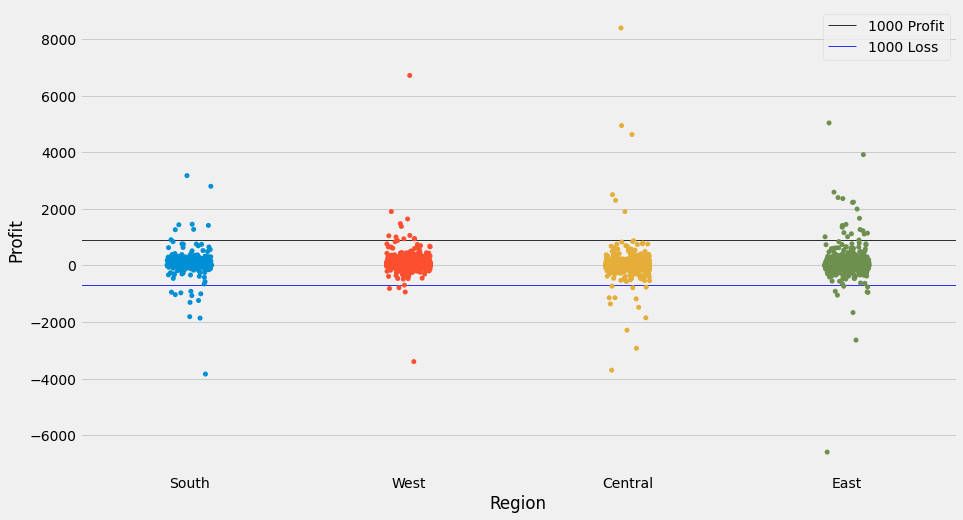

In [175]:
plt.figure(figsize=(14,8))
sns.stripplot(data=df1,x=df1["Region"],y=df1["Profit"])
plt.axhline(900,linewidth=0.8,color="Black",label="1000 Profit")
plt.axhline(-700,linewidth=0.8,color="blue",label="1000 Loss")
plt.legend()

## More dots below Blue Line means Region facing High losses 
## More dots above Black line means Region getting High Profit

In [ ]:
##END

# Thanks Happy Learning!